# Regularisation
---

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


import torch.nn as nn

from torch.utils.data import Dataset, DataLoader
from torch.optim      import Adam, LBFGS
from tqdm import tqdm

In [2]:
a       = torch.rand(256, requires_grad=True)
a.data += torch.linspace(0,3,256)**2 - torch.linspace(0,2,256)**3 + torch.sin(torch.linspace(0,17,256))

def haar_loss(a):
    loss = torch.zeros(1)
    while len(a) > 1:
        loss += nn.functional.mse_loss(a[0::2], a[1::2]) * len(a)
        a = 0.5*(a[0::2] + a[1::2])
    return loss


N_epochs = 100
lr       = 1.0e-2

optimizer = Adam([a], lr=lr)


losses = []

a_old = a.detach().clone()

for _ in tqdm(range(N_epochs)):
    
    loss_func = haar_loss(a)
    
    losses.append(loss_func.item())
    
    optimizer.zero_grad()
    loss_func.backward ()
    optimizer.step     ()

  0%|          | 0/100 [00:00<?, ?it/s]/home/frederikd/.local/lib/python3.9/site-packages/torch/autograd/__init__.py:200: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|██████████| 100/100 [00:00<00:00, 295.49it/s]


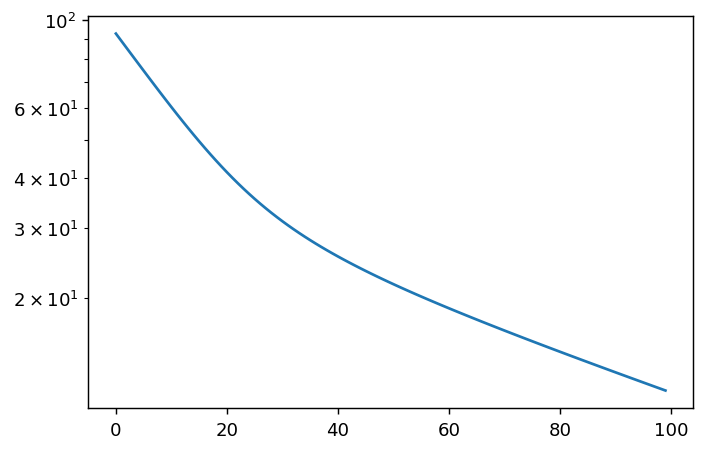

In [3]:
plt.figure(dpi=130)
plt.plot(losses)
plt.yscale('log')

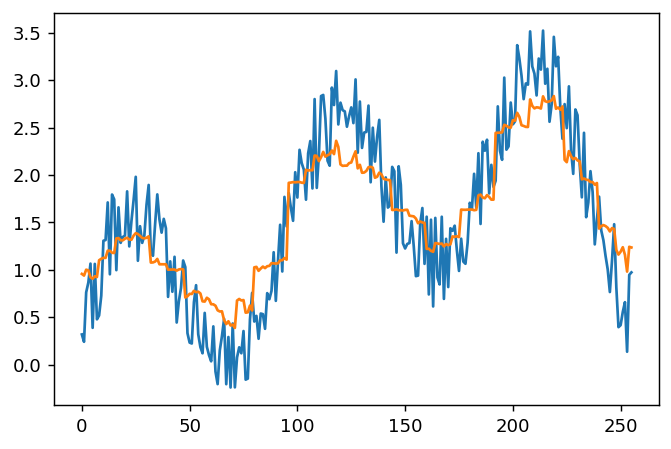

In [4]:
plt.figure(dpi=130)
plt.plot(a_old)
plt.plot(a.data)

In [5]:
a       = torch.rand(256, requires_grad=True)
a.data += torch.linspace(0,3,256)**2 - torch.linspace(0,2,256)**3 + torch.sin(torch.linspace(0,17,256))


def fourier_loss(a):
    
    fft  = torch.abs(torch.fft.rfft(a))
    size = fft.size(0)
    wts  = torch.arange(size)
    loss = nn.functional.mse_loss(fft*wts, torch.zeros(size, dtype=fft.dtype))
    
    return loss


N_epochs = 100
lr       = 1.0e-2

optimizer = Adam([a], lr=lr)


losses = []

a_old = a.detach().clone()

for _ in tqdm(range(N_epochs)):
    
    loss_func = fourier_loss(a)
    
    losses.append(loss_func.item())
    
    optimizer.zero_grad()
    loss_func.backward ()
    optimizer.step     ()

100%|██████████| 100/100 [00:00<00:00, 243.03it/s]


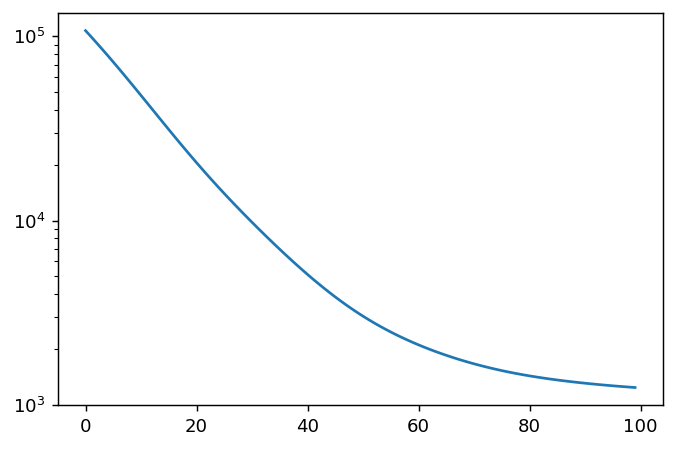

In [6]:
plt.figure(dpi=130)
plt.plot(losses)
plt.yscale('log')

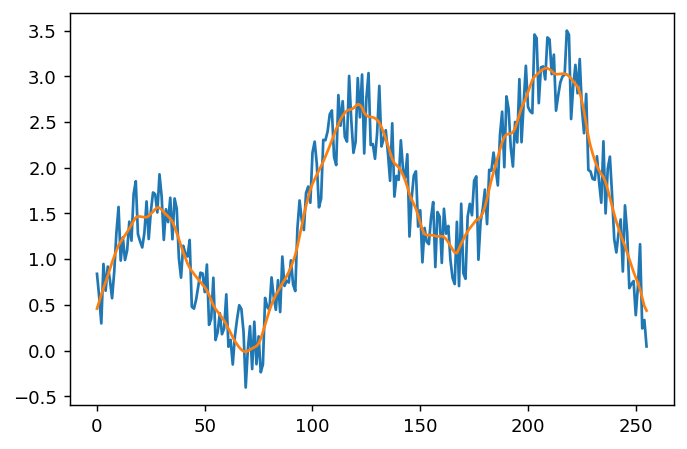

In [7]:
plt.figure(dpi=130)
plt.plot(a_old)
plt.plot(a.data)

In [8]:

# arr.data *= mask
    
fft = torch.abs(torch.fft.rfftn(arr))
    
inds = np.indices(fft.shape)

a = np.linalg.norm(inds, axis=0)
b = np.linalg.norm((np.array(fft.shape)-inds.T).T, axis=0)

wgt = np.empty_like(a)
wgt[a <= b] = a[a <= b]
wgt[b <= a] = b[b <= a]

NameError: name 'arr' is not defined

In [ ]:
plt.figure(dpi=150)
plt.imshow(arr.data)

NameError: name 'arr' is not defined

<Figure size 900x600 with 0 Axes>

(-0.5, 128.5)

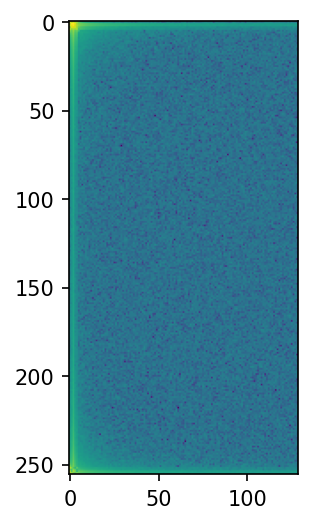

In [ ]:
plt.figure(dpi=150)
# plt.imshow(np.log(torch.fft.fftshift(fft).data))
plt.imshow(np.log(fft.data))
plt.xlim()

(-0.5, 128.5)

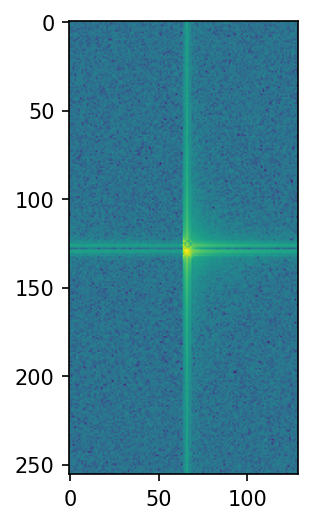

In [ ]:
plt.figure(dpi=150)
plt.imshow(np.log(torch.fft.fftshift(fft).data))
# plt.imshow(np.log(fft.data))

In [ ]:
wgt = np.indices(fft.shape)
wgt = (wgt.T - 0.5*np.array(fft.shape)).T
wgt = np.linalg.norm(wgt, axis=0)

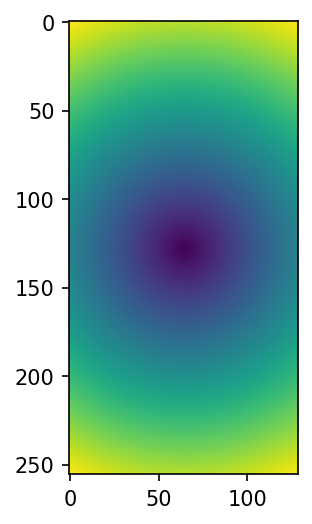

In [ ]:
plt.figure(dpi=150)
plt.imshow(wgt)
# plt.imshow(np.log(fft.data))

Note the "cross" artifact in the Fourrier transform. This is a result of the aperiodicity of the array across its borders. 

In [ ]:
Np = 256
x ,y = np.indices((Np,Np))/Np
a       = torch.rand((Np, Np), requires_grad=True)
a.data += np.cos(17*x**2) + np.sin(25*y*x) + np.sin(np.cos(10*y+9*x))
  

def fourier_loss_3D(arr):
    
    fft = torch.abs(torch.fft.fftn(arr))
    
    wgt = np.indices(fft.shape)
    wgt = (wgt.T - 0.5*np.array(fft.shape)).T
    wgt = np.linalg.norm(wgt, axis=0)
    
    wgt = torch.from_numpy(wgt)

    loss = torch.mean((torch.fft.fftshift(fft)*wgt)**2)
    
    return loss


N_epochs = 100
lr       = 1.0e-2

optimizer = Adam([a], lr=lr)


losses = []

a_old = a.detach().clone()

for _ in tqdm(range(N_epochs)):
    
    loss_func = fourier_loss_3D(a)
    
    losses.append(loss_func.item())
    
    optimizer.zero_grad()
    loss_func.backward ()
    optimizer.step     ()

NameError: name 'np' is not defined

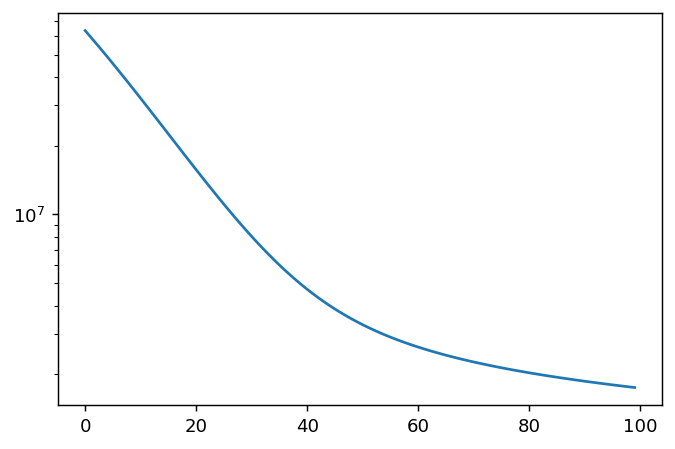

In [ ]:
plt.figure(dpi=130)
plt.plot(losses)
plt.yscale('log')

TypeError: Invalid shape (256,) for image data

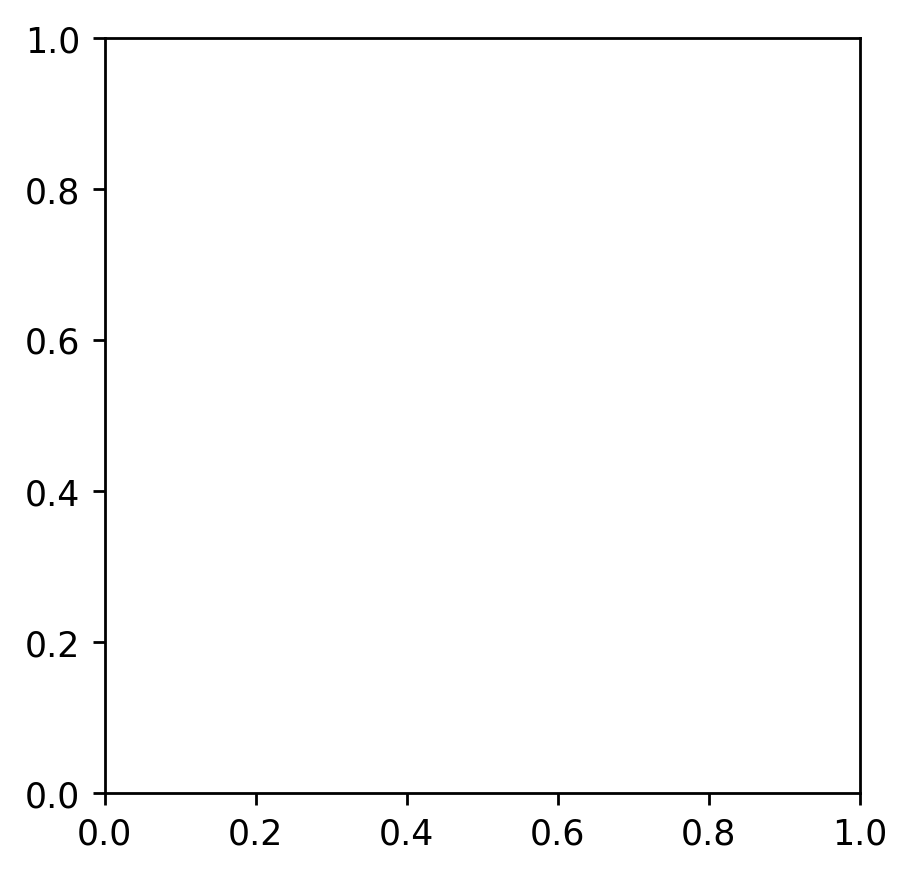

In [11]:
plt.figure(dpi=250)
plt.imshow(a_old.data)

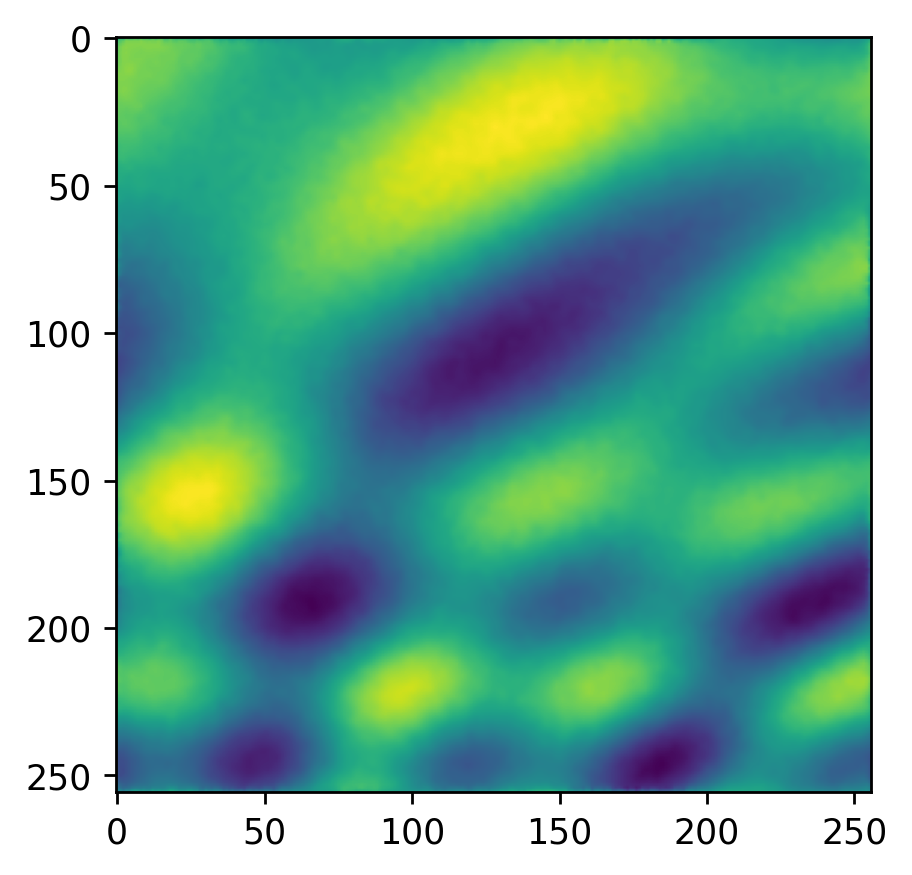

In [ ]:
plt.figure(dpi=250)
plt.imshow(a.data)

In [ ]:
from ipywidgets import interact

In [10]:
def plot(i):
    plt.figure(dpi=150)
    plt.plot(a_old[:,i].data)
    plt.plot(a[:,i].data)
    
interact(plot, i=(0,a.shape[0]-1))

NameError: name 'interact' is not defined

In [12]:
Np = 256
x ,y = np.indices((Np,Np))/Np
a       = torch.rand((Np, Np), requires_grad=True)
a.data += np.cos(17*x**2) + np.sin(25*y*x) + np.sin(np.cos(10*y+9*x))
  

def derivative_loss(arr):
    loss = torch.zeros(1)
    for d in range(arr.dim()):
        loss += torch.mean(torch.diff(arr, dim=d)**2)
    return loss


N_epochs = 100
lr       = 1.0e-2

optimizer = Adam([a], lr=lr)


losses = []

a_old = a.detach().clone()

for _ in tqdm(range(N_epochs)):
    
    loss_func = derivative_loss(a)
    
    losses.append(loss_func.item())
    
    optimizer.zero_grad()
    loss_func.backward ()
    optimizer.step     ()

100%|██████████| 100/100 [00:00<00:00, 335.88it/s]


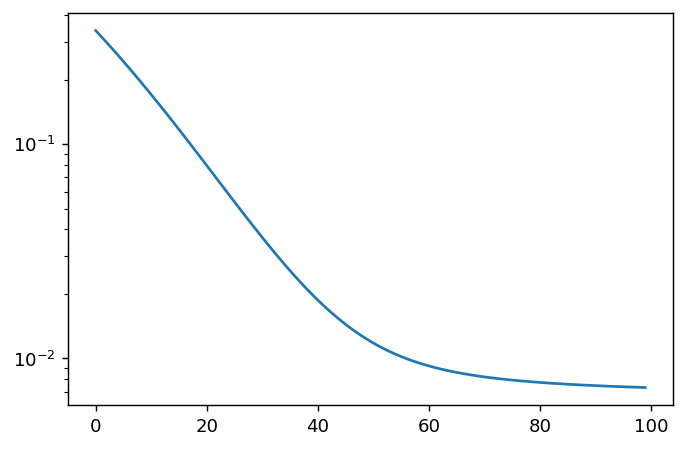

In [13]:
plt.figure(dpi=130)
plt.plot(losses)
plt.yscale('log')

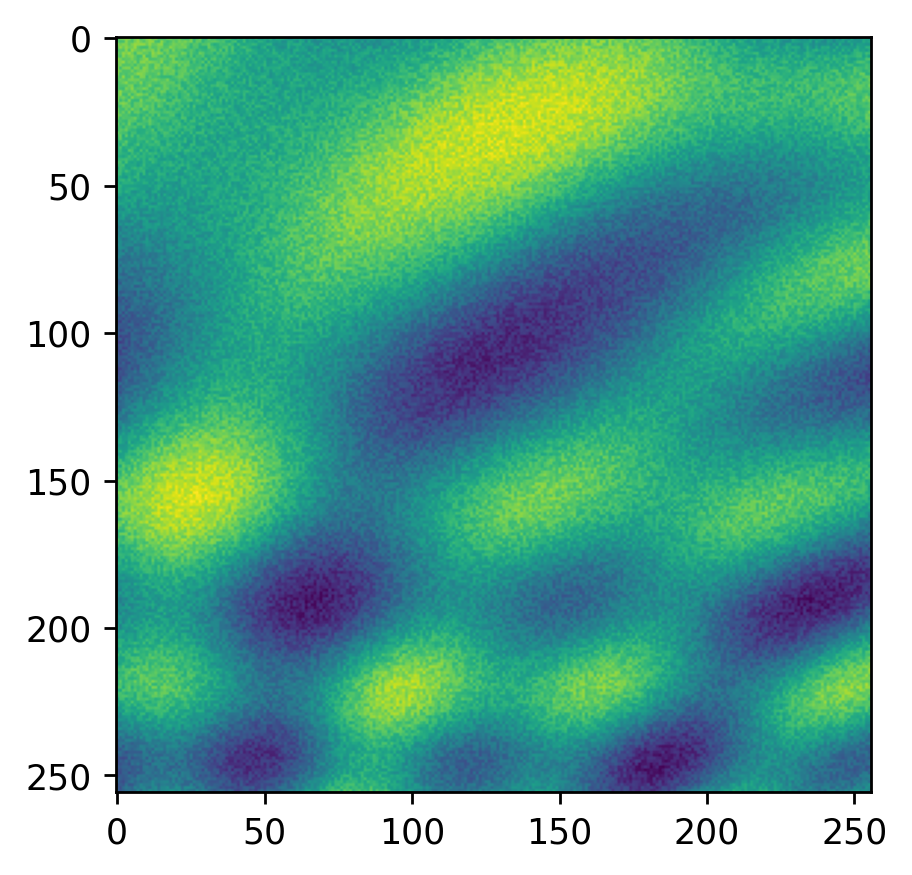

In [14]:
plt.figure(dpi=250)
plt.imshow(a_old.data)

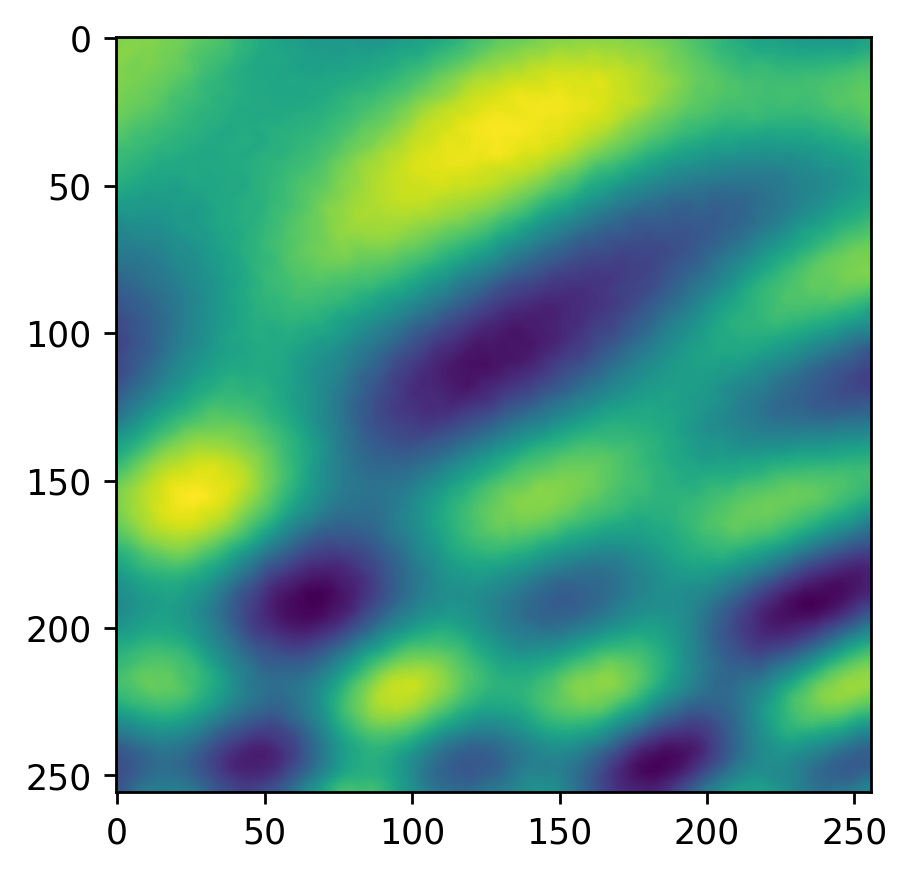

In [15]:
plt.figure(dpi=250)
plt.imshow(a.data)

In [16]:
Np = 256
x ,y = np.indices((Np,Np))/Np
a       = torch.rand((Np, Np), requires_grad=True)
a.data += np.cos(17*x**2) + np.sin(25*y*x) + np.sin(np.cos(10*y+9*x))
  

def y_symmetry_loss(arr):
    return torch.mean((arr - torch.flip(arr, dims=(1,)))**2)


N_epochs = 100
lr       = 1.0e-2

optimizer = Adam([a], lr=lr)


losses = []

a_old = a.detach().clone()

for _ in tqdm(range(N_epochs)):
    
    loss_func = y_symmetry_loss(a)
    
    losses.append(loss_func.item())
    
    optimizer.zero_grad()
    loss_func.backward ()
    optimizer.step     ()

100%|██████████| 100/100 [00:00<00:00, 629.86it/s]


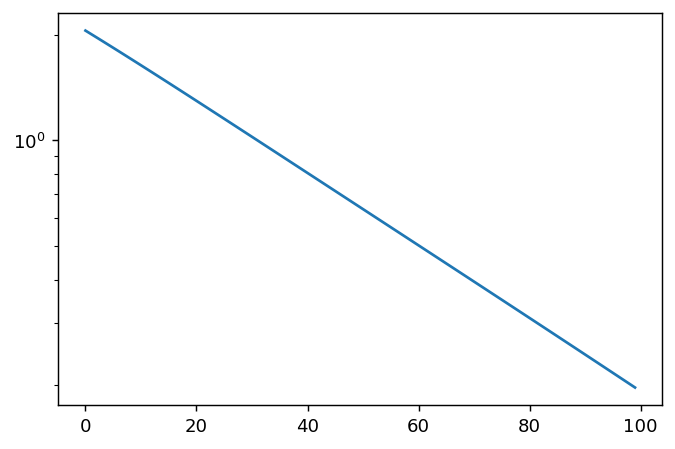

In [17]:
plt.figure(dpi=130)
plt.plot(losses)
plt.yscale('log')

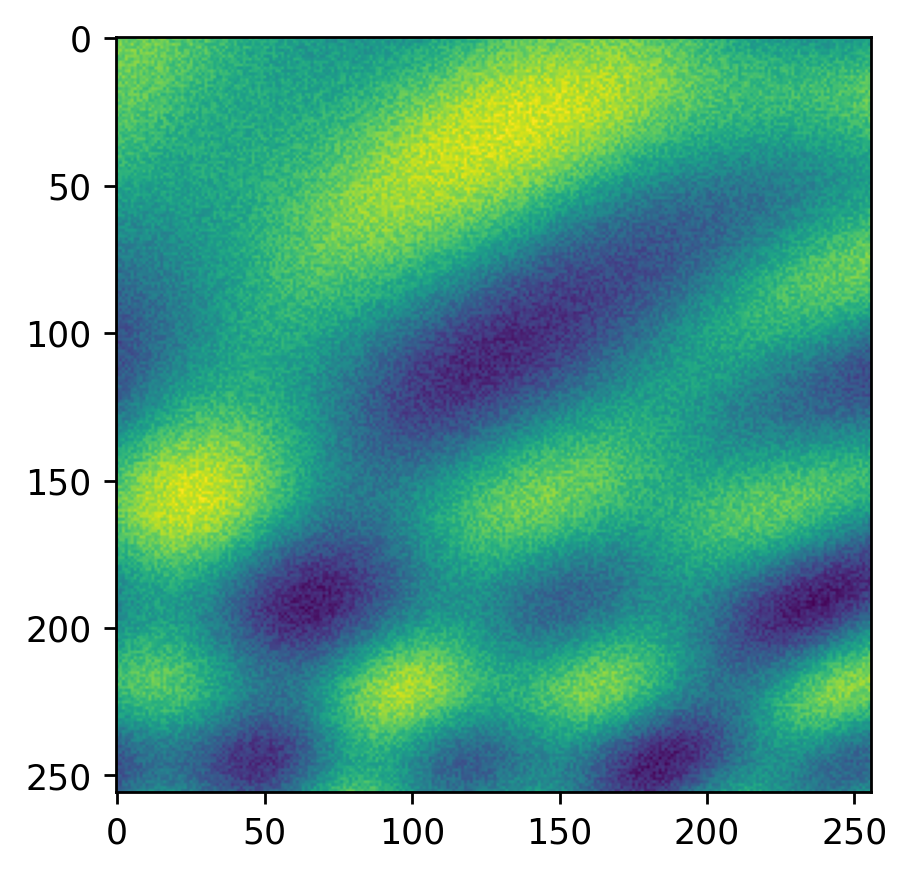

In [18]:
plt.figure(dpi=250)
plt.imshow(a_old.data)

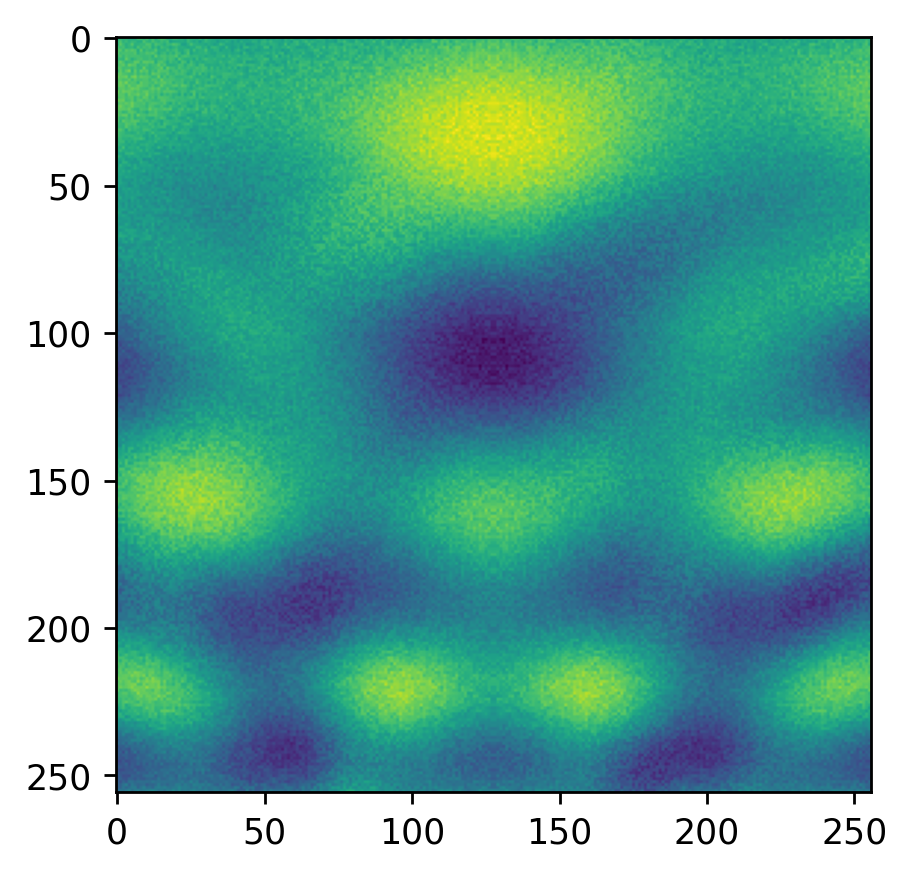

In [19]:
plt.figure(dpi=250)
plt.imshow(a.data)